In [1]:
import os
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

DATA_DIR = pathlib.Path(os.getcwd()).parents[1] / 'data/synthetic'


In [2]:
# y = a * sin(b * t + c) + d + noise

np.random.seed(123)

NUM_SEQUENCES = 5000
NUM_POINTS = 150
MAX_TIME = 50
time_min = 0
noise = 0

initial_values = []
times = []
values = []

for id in range(NUM_SEQUENCES):
    t = np.sort(np.random.uniform(time_min, MAX_TIME, NUM_POINTS))
    rdm_a = np.random.uniform(0.5, 2)
    rdm_b = np.random.uniform(0.5, 2)
    rdm_c = np.random.uniform(0, 2 * np.pi)
    rdm_d = np.random.uniform(-2, 2)
    noise = np.random.normal(0, 0.2, NUM_POINTS) * rdm_a
    
    y = rdm_a * np.sin(rdm_b * t + rdm_c) + rdm_d + noise
    
    # y = np.sin(t[:, None]) + y0 + noise
    
    times.extend(t.tolist())
    values.extend(y.tolist())

ids = np.repeat(np.arange(NUM_SEQUENCES), NUM_POINTS)
# Create a DataFrame
df_synth = pd.DataFrame({"id": ids, "times": times, "values": values})

# Set "id" as the index
df_synth.set_index("id", inplace=True)

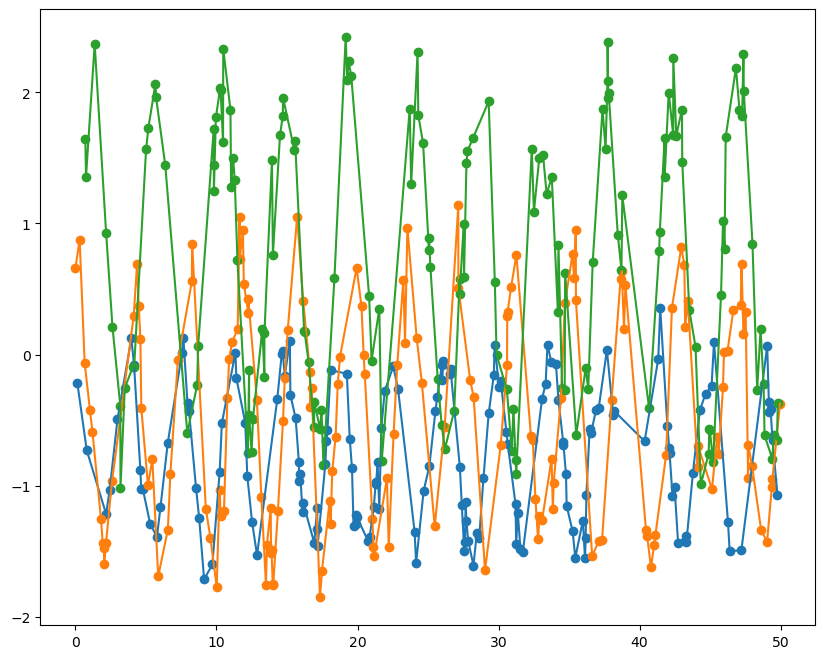

In [3]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
for i in range(3):
    ax.plot(df_synth.loc[i]["times"], df_synth.loc[i]["values"])
    ax.scatter(df_synth.loc[i]["times"], df_synth.loc[i]["values"])

In [4]:
df_synth.shape

(750000, 2)

In [5]:
df_synth.head()

,times,values
id,,
0,0.134403,-0.214451
0,0.806460,-0.731005
0,2.179573,-1.217650
0,2.428952,-1.032985
0,2.983895,-0.494182


In [6]:
df_synth.to_csv(DATA_DIR / 'synthetic.csv')